In [1]:
# Include this line to make plots interactive
#%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import json
import collections

In [3]:
# pulling the data from the csv file 
zomato_df = pd.read_csv("../Output/4_post_presentation/csv/Zomato_Restaurants_All_Consolidated-Types.csv")
zomato_df

,Unnamed: 0,Name,Aggregate Rating,Type,Price,Latitude,Longitude,Sensor ID,Sensor
0,10,Hungry Jack's,3.2,Fast Food,2,-37.812758,144.967896,21,Bourke St-Russell St (West)
1,11,Udon Yasan,4.0,Restaurant,2,-37.812772,144.967762,21,Bourke St-Russell St (West)
2,12,Heroes,3.0,Restaurant,3,-37.812770,144.967708,21,Bourke St-Russell St (West)
3,13,Tiger Tea 虎將,3.4,Beverages,1,-37.812596,144.967410,21,Bourke St-Russell St (West)
4,14,Two Peck Crispy Chicken,3.4,Restaurant,1,-37.812487,144.967358,21,Bourke St-Russell St (West)
...,...,...,...,...,...,...,...,...,...
394,534,Narocha Premium Tea Room,4.1,Beverages,1,-37.807102,144.960176,51,QVM-Franklin St (North)
395,535,Simply Spanish,3.9,Restaurant,3,-37.806895,144.959613,51,QVM-Franklin St (North)
396,537,NeNe Chicken,3.2,Restaurant,2,-37.809013,144.960929,51,QVM-Franklin St (North)
397,538,Andrew's Bread Shop,3.7,Bakery,1,-37.806817,144.959129,51,QVM-Franklin St (North)


In [4]:
zomato_df.count()

Unnamed: 0          399
Name                399
Aggregate Rating    399
Type                399
Price               399
Latitude            399
Longitude           399
Sensor ID           399
Sensor              399
dtype: int64

In [5]:
zomato_df.dtypes

Unnamed: 0            int64
Name                 object
Aggregate Rating    float64
Type                 object
Price                 int64
Latitude            float64
Longitude           float64
Sensor ID             int64
Sensor               object
dtype: object

In [6]:
location_df = pd.read_csv("../Output/4_post_presentation/csv/sensor_locs_final_9.csv")
location_df

,Location,Daily Average
0,Town Hall (West),1448.107093
1,Spencer St-Collins St (North),1406.290151
2,Southbank,1251.470469
3,Collins St (North),719.771243
4,Bourke St-Russell St (West),665.944904
5,Chinatown-Lt Bourke St (South),424.210388
6,Flinders St-Spark La,147.414485
7,QVM-Franklin St (North),132.538986
8,Lygon St (East),144.742824


In [7]:
location_df = location_df.set_index("Location").sort_index()
location_df

,Daily Average
Location,
Bourke St-Russell St (West),665.944904
Chinatown-Lt Bourke St (South),424.210388
Collins St (North),719.771243
Flinders St-Spark La,147.414485
Lygon St (East),144.742824
QVM-Franklin St (North),132.538986
Southbank,1251.470469
Spencer St-Collins St (North),1406.290151
Town Hall (West),1448.107093


In [8]:
location_df = location_df.rename(index={"Collins St (North)":"Collins Street (North)"})
location_df

,Daily Average
Location,
Bourke St-Russell St (West),665.944904
Chinatown-Lt Bourke St (South),424.210388
Collins Street (North),719.771243
Flinders St-Spark La,147.414485
Lygon St (East),144.742824
QVM-Franklin St (North),132.538986
Southbank,1251.470469
Spencer St-Collins St (North),1406.290151
Town Hall (West),1448.107093


In [9]:
big_merge_df = pd.merge(zomato_df,location_df,left_on="Sensor",right_index=True,how="outer")
big_merge_df

,Unnamed: 0,Name,Aggregate Rating,Type,Price,Latitude,Longitude,Sensor ID,Sensor,Daily Average
0,10,Hungry Jack's,3.2,Fast Food,2,-37.812758,144.967896,21,Bourke St-Russell St (West),665.944904
1,11,Udon Yasan,4.0,Restaurant,2,-37.812772,144.967762,21,Bourke St-Russell St (West),665.944904
2,12,Heroes,3.0,Restaurant,3,-37.812770,144.967708,21,Bourke St-Russell St (West),665.944904
3,13,Tiger Tea 虎將,3.4,Beverages,1,-37.812596,144.967410,21,Bourke St-Russell St (West),665.944904
4,14,Two Peck Crispy Chicken,3.4,Restaurant,1,-37.812487,144.967358,21,Bourke St-Russell St (West),665.944904
...,...,...,...,...,...,...,...,...,...,...
394,534,Narocha Premium Tea Room,4.1,Beverages,1,-37.807102,144.960176,51,QVM-Franklin St (North),132.538986
395,535,Simply Spanish,3.9,Restaurant,3,-37.806895,144.959613,51,QVM-Franklin St (North),132.538986
396,537,NeNe Chicken,3.2,Restaurant,2,-37.809013,144.960929,51,QVM-Franklin St (North),132.538986
397,538,Andrew's Bread Shop,3.7,Bakery,1,-37.806817,144.959129,51,QVM-Franklin St (North),132.538986


In [10]:
#scatter plot by rating
foot_traffic_big = big_merge_df["Daily Average"]
rating_big = big_merge_df["Aggregate Rating"]
price_big = big_merge_df["Price"]

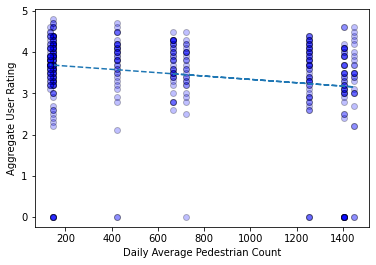

r value = -0.2104763671381818
r squared = 0.04430030112368669


In [31]:
rate_b_slope, rate_b_int, rate_b_r, rate_b_p, rate_b_std_err = stats.linregress(foot_traffic_big, rating_big)
rate_b_fit = rate_b_slope * foot_traffic_big + rate_b_int
plt.scatter(foot_traffic_big, rating_big, marker="o", facecolors="blue", edgecolors="black", alpha=0.25)
plt.xlabel("Daily Average Pedestrian Count")
plt.ylabel("Aggregate User Rating")
plt.plot(foot_traffic_big,rate_b_fit,"--")
plt.savefig("../Output/4_post_presentation/scatter_ratings.png")
plt.show()
print(f"r value = {rate_b_r}")
print(f"r squared = {rate_b_r**2}")

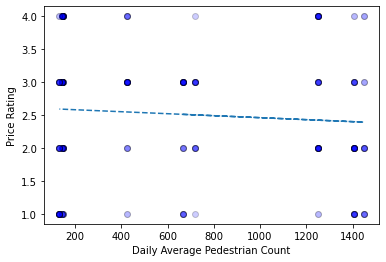

r value = -0.07989640303946756
r squared = 0.006383435218645041


In [32]:
price_slope, price_int, price_r, price_p, price_std_err = stats.linregress(foot_traffic_big, price_big)
price_fit = price_slope * foot_traffic_big + price_int
plt.scatter(foot_traffic_big, price_big, marker="o", facecolors="blue", edgecolors="black", alpha=0.1)
plt.xlabel("Daily Average Pedestrian Count")
plt.ylabel("Price Rating")
plt.plot(foot_traffic_big,price_fit,"--")
plt.savefig("../Output/4_post_presentation/scatter_price.png")
plt.show()
print(f"r value = {price_r}")
print(f"r squared = {price_r**2}")

In [33]:
# grouping by the sensor and applying aggregates
grouped = zomato_df.groupby(["Sensor"])
averages_df = grouped[['Aggregate Rating','Price']].mean()
averages_df.head()

,Aggregate Rating,Price
Sensor,,
Bourke St-Russell St (West),3.723684,2.342105
Chinatown-Lt Bourke St (South),3.633333,2.897436
Collins Street (North),3.488889,2.592593
Flinders St-Spark La,3.759184,2.836735
Lygon St (East),3.370690,2.775862


In [34]:
merge_df = pd.merge(averages_df,location_df, left_index=True, right_index=True, how="outer")
merge_df

,Aggregate Rating,Price,Daily Average
Sensor,,,
Bourke St-Russell St (West),3.723684,2.342105,665.944904
Chinatown-Lt Bourke St (South),3.633333,2.897436,424.210388
Collins Street (North),3.488889,2.592593,719.771243
Flinders St-Spark La,3.759184,2.836735,147.414485
Lygon St (East),3.370690,2.775862,144.742824
QVM-Franklin St (North),3.792593,1.962963,132.538986
Southbank,3.460714,2.857143,1251.470469
Spencer St-Collins St (North),2.823077,2.076923,1406.290151
Town Hall (West),3.246154,2.153846,1448.107093


In [35]:
#merge_df.to_csv("../Output/csv/combined_sensor_rating_price_traffic.csv")

In [36]:
merge_df.dtypes

Aggregate Rating    float64
Price               float64
Daily Average       float64
dtype: object

In [37]:
merge_df = merge_df.reset_index()

In [38]:
merge_df = merge_df.sort_values(by="Daily Average", ascending=False)
merge_df

,Sensor,Aggregate Rating,Price,Daily Average
8,Town Hall (West),3.246154,2.153846,1448.107093
7,Spencer St-Collins St (North),2.823077,2.076923,1406.290151
6,Southbank,3.460714,2.857143,1251.470469
2,Collins Street (North),3.488889,2.592593,719.771243
0,Bourke St-Russell St (West),3.723684,2.342105,665.944904
1,Chinatown-Lt Bourke St (South),3.633333,2.897436,424.210388
3,Flinders St-Spark La,3.759184,2.836735,147.414485
4,Lygon St (East),3.370690,2.775862,144.742824
5,QVM-Franklin St (North),3.792593,1.962963,132.538986


In [39]:
foot_traffic = merge_df["Daily Average"]
rating = merge_df["Aggregate Rating"]
locations = merge_df["Sensor"]
price = merge_df["Price"]

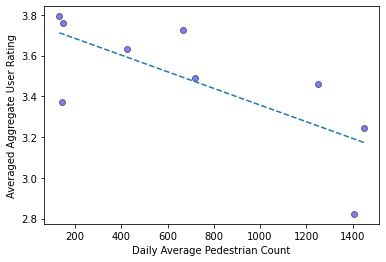

r value = -0.7238681613106428
r squared = 0.5239851149592508


In [40]:
# linear regression
rate_slope, rate_int, rate_r, rate_p, rate_std_err = stats.linregress(foot_traffic, rating)
rate_fit = rate_slope * foot_traffic + rate_int

# scatter plot by rating
plt.scatter(foot_traffic, rating, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.xlabel("Daily Average Pedestrian Count")
plt.ylabel("Averaged Aggregate User Rating")
plt.plot(foot_traffic,rate_fit,"--")
plt.savefig("../Output/4_post_presentation/ratings_per_pedestrian.png")
plt.show()
print(f"r value = {rate_r}")
print(f"r squared = {rate_r**2}")

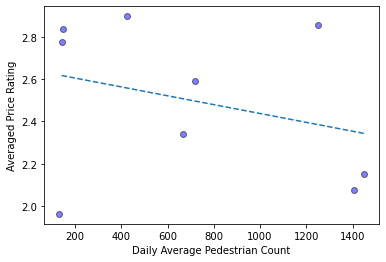

r value = -0.30847646422616165
r squared = 0.09515772898147438


In [41]:
# linear regression
price_slope, price_int, price_r, price_p, price_std_err = stats.linregress(foot_traffic, price)
price_fit = price_slope * foot_traffic + price_int

# scatter plot by price
plt.scatter(foot_traffic, price, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.xlabel("Daily Average Pedestrian Count")
plt.ylabel("Averaged Price Rating")
plt.plot(foot_traffic,price_fit,"--")
plt.savefig("../Output/4_post_presentation/ratings_per_price.png")
plt.show()
print(f"r value = {price_r}")
print(f"r squared = {price_r**2}")

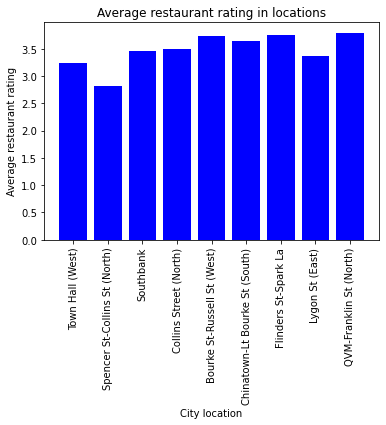

In [42]:
# Create a bar chart based upon the above data
plt.bar(locations, rating, color="b", align="center")

plt.title("Average restaurant rating in locations")
plt.xlabel("City location")
plt.ylabel("Average restaurant rating")
plt.xticks(locations, rotation=90)
plt.savefig("../Output/4_post_presentation/barchart_avratingin9locations.png.png")
plt.show()

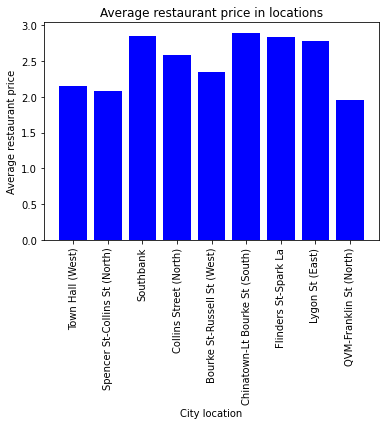

In [43]:
# Create a bar chart based upon the above data
plt.bar(locations, price, color="b", align="center")

plt.title("Average restaurant price in locations")
plt.xlabel("City location")
plt.ylabel("Average restaurant price")
plt.xticks(locations, rotation=90)
plt.savefig("../Output/4_post_presentation/barchart_avpricein9locations.png.png")
plt.show()

In [44]:
loc_list = merge_df["Sensor"].tolist()
loc_list

['Town Hall (West)',
 'Spencer St-Collins St (North)',
 'Southbank',
 'Collins Street (North)',
 'Bourke St-Russell St (West)',
 'Chinatown-Lt Bourke St (South)',
 'Flinders St-Spark La',
 'Lygon St (East)',
 'QVM-Franklin St (North)']

In [45]:
a_dict = {}
# a_dict["a"].append("hello")

for location in loc_list:
#     print(location)
    if location in a_dict:
        a_dict[location].append(zomato_df.loc[zomato_df["Sensor"] == location,:].groupby(["Type"])["Name"].count().to_dict())
    else:
        a_dict[location] = zomato_df.loc[zomato_df["Sensor"] == location,:].groupby(["Type"])["Name"].count().to_dict()


In [46]:
a_locs = pd.DataFrame(a_dict)
type_locs = a_locs.T
type_locs

,Bakery,Bar,Beverages,Cafe,Restaurant,Desserts,Fast Food,Pub
Town Hall (West),1.0,2.0,4.0,6.0,13.0,NaN,NaN,NaN
Spencer St-Collins St (North),2.0,4.0,3.0,13.0,19.0,2.0,8.0,1.0
Southbank,NaN,4.0,1.0,9.0,31.0,3.0,7.0,1.0
Collins Street (North),1.0,1.0,1.0,14.0,6.0,1.0,2.0,1.0
Bourke St-Russell St (West),1.0,NaN,3.0,1.0,28.0,2.0,3.0,NaN
Chinatown-Lt Bourke St (South),NaN,5.0,2.0,1.0,30.0,1.0,NaN,NaN
Flinders St-Spark La,1.0,4.0,2.0,16.0,21.0,2.0,3.0,NaN
Lygon St (East),NaN,3.0,3.0,7.0,40.0,4.0,1.0,NaN
QVM-Franklin St (North),4.0,2.0,7.0,6.0,21.0,6.0,7.0,1.0


In [47]:
types_merge = pd.merge(location_df, type_locs, left_index=True, right_index=True, how="outer")
types_merge.fillna(0)

,Daily Average,Bakery,Bar,Beverages,Cafe,Restaurant,Desserts,Fast Food,Pub
Bourke St-Russell St (West),665.944904,1.0,0.0,3.0,1.0,28.0,2.0,3.0,0.0
Chinatown-Lt Bourke St (South),424.210388,0.0,5.0,2.0,1.0,30.0,1.0,0.0,0.0
Collins Street (North),719.771243,1.0,1.0,1.0,14.0,6.0,1.0,2.0,1.0
Flinders St-Spark La,147.414485,1.0,4.0,2.0,16.0,21.0,2.0,3.0,0.0
Lygon St (East),144.742824,0.0,3.0,3.0,7.0,40.0,4.0,1.0,0.0
QVM-Franklin St (North),132.538986,4.0,2.0,7.0,6.0,21.0,6.0,7.0,1.0
Southbank,1251.470469,0.0,4.0,1.0,9.0,31.0,3.0,7.0,1.0
Spencer St-Collins St (North),1406.290151,2.0,4.0,3.0,13.0,19.0,2.0,8.0,1.0
Town Hall (West),1448.107093,1.0,2.0,4.0,6.0,13.0,0.0,0.0,0.0


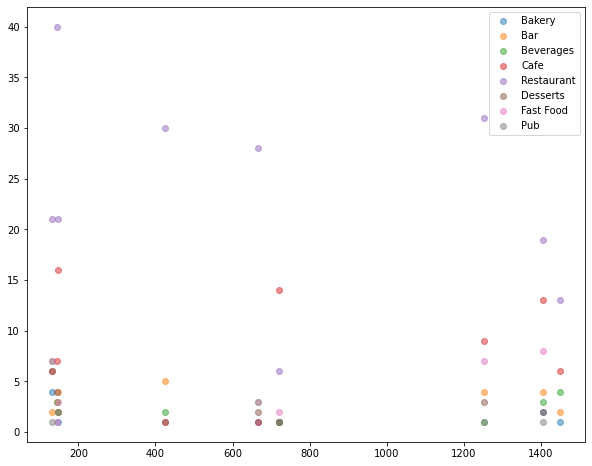

In [48]:
count=1
plt.subplots(figsize=(10, 8))
for i in type_locs.columns:
    #plt.subplot(3,2,count)
    plt.scatter(types_merge["Daily Average"],types_merge[i],alpha=.5)
    plt.legend(type_locs.columns)
    count+=1

plt.show()
